## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [39]:
## 
"""
Your code here (optional)
確認硬體資源
"""
## 確認硬體資源 (如果你是在 Linux, 若是在 Windows, 請參考 https://blog.csdn.net/idwtwt/article/details/78017565)
!nvidia-smi

'nvidia-smi' 不是內部或外部命令、可執行的程式或批次檔。


In [40]:
import os
import keras

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [41]:
train, test = keras.datasets.cifar10.load_data()

In [42]:
## 資料前處理
"""
Your code here
"""
## 資料前處理
def preproc_x(x, flatten=True):
    x = 2 * (((x-x.min())/(x.max()-x.min())) - 0.5)
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y

In [43]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [44]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128,64,32]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)               

In [45]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [46]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [47]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Epoch 1/100
196/196 [==============================] - 4s 21ms/step - loss: 1.7410 - accuracy: 0.3842 - val_loss: 1.5884 - val_accuracy: 0.4375
Epoch 2/100
196/196 [==============================] - 4s 19ms/step - loss: 1.4990 - accuracy: 0.4707 - val_loss: 1.4669 - val_accuracy: 0.4864
Epoch 3/100
196/196 [==============================] - 4s 20ms/step - loss: 1.3766 - accuracy: 0.5155 - val_loss: 1.4348 - val_accuracy: 0.4886
Epoch 4/100
196/196 [==============================] - 4s 20ms/step - loss: 1.2817 - accuracy: 0.5495 - val_loss: 1.3760 - val_accuracy: 0.5194
Epoch 5/100
196/196 [==============================] - 4s 19ms/step - loss: 1.1898 - accuracy: 0.5809 - val_loss: 1.3732 - val_accuracy: 0.5206
Epoch 6/100
196/196 [==============================] - 4s 19ms/step - loss: 1.1198 - accuracy: 0.6050 - val_loss: 1.3415 - val_accuracy: 0.5281
Epoch 7/100
196/196 [==============================] - 4s 19ms/step - loss: 1.0374 - accuracy: 0.6332 - val_loss: 1.3657 - val_accuracy:

196/196 [==============================] - 3s 17ms/step - loss: 0.0861 - accuracy: 0.9706 - val_loss: 4.0033 - val_accuracy: 0.5237
Epoch 58/100
196/196 [==============================] - 3s 17ms/step - loss: 0.0939 - accuracy: 0.9683 - val_loss: 4.2783 - val_accuracy: 0.5194
Epoch 59/100
196/196 [==============================] - 3s 17ms/step - loss: 0.1095 - accuracy: 0.9639 - val_loss: 4.0968 - val_accuracy: 0.5300
Epoch 60/100
196/196 [==============================] - 3s 17ms/step - loss: 0.0937 - accuracy: 0.9687 - val_loss: 4.1200 - val_accuracy: 0.5228
Epoch 61/100
196/196 [==============================] - 3s 17ms/step - loss: 0.1020 - accuracy: 0.9663 - val_loss: 3.8054 - val_accuracy: 0.5307
Epoch 62/100
196/196 [==============================] - 3s 17ms/step - loss: 0.0773 - accuracy: 0.9751 - val_loss: 4.2626 - val_accuracy: 0.5297
Epoch 63/100
196/196 [==============================] - 3s 17ms/step - loss: 0.1071 - accuracy: 0.9657 - val_loss: 4.0641 - val_accuracy: 0.531

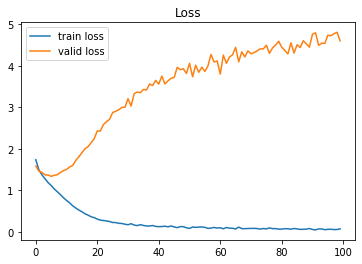

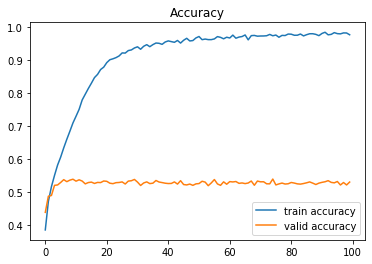

In [48]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()